Criando um dicionário contendo vários DataFrames a partir de um arquivo excel

In [148]:
import pandas as pd

df_roubo_veiculos = pd.read_excel('ROUBO_VEICULOS.xltx', sheet_name = None)

Chaves do dicionário

Cada chave está associada a um DataFrame diferente

Cada DataFrame contém dados sobre BOs de um ano e mês específicos (ex: Janeiro de 2023)

In [149]:
df_roubo_veiculos.keys()

dict_keys(['DadosBO_2023_1(ROUBO DE VEÍCULO', 'DadosBO_2022_1(ROUBO DE VEÍCULO', 'DadosBO_2022_2(ROUBO DE VEÍCULO', 'DadosBO_2022_3(ROUBO DE VEÍCULO', 'DadosBO_2022_4(ROUBO DE VEÍCULO', 'DadosBO_2022_5(ROUBO DE VEÍCULO', 'DadosBO_2022_6(ROUBO DE VEÍCULO', 'DadosBO_2022_7(ROUBO DE VEÍCULO', 'DadosBO_2022_8(ROUBO DE VEÍCULO', 'DadosBO_2022_9(ROUBO DE VEÍCULO', 'DadosBO_2022_10(ROUBO DE VEÍCUL', 'DadosBO_2022_11(ROUBO DE VEÍCUL', 'DadosBO_2022_12(ROUBO DE VEÍCUL', 'DadosBO_2021_1(ROUBO DE VEÍCULO', 'DadosBO_2021_2(ROUBO DE VEÍCULO', 'DadosBO_2021_3(ROUBO DE VEÍCULO', 'DadosBO_2021_4(ROUBO DE VEÍCULO', 'DadosBO_2021_5(ROUBO DE VEÍCULO', 'DadosBO_2021_6(ROUBO DE VEÍCULO', 'DadosBO_2021_7(ROUBO DE VEÍCULO', 'DadosBO_2021_8(ROUBO DE VEÍCULO', 'DadosBO_2021_9(ROUBO DE VEÍCULO', 'DadosBO_2021_10(ROUBO DE VEÍCUL', 'DadosBO_2021_11(ROUBO DE VEÍCUL', 'DadosBO_2021_12(ROUBO DE VEÍCUL'])

Removendo dados duplicados de cada um dos DataFrames contido no dicionário

In [150]:
for key in df_roubo_veiculos.keys():
  df_roubo_veiculos[key].drop_duplicates(inplace = True)

Filtrando os dados para obter apenas os dados da cidade de São Paulo

In [151]:
for key in df_roubo_veiculos.keys():
  filtragem_sp = df_roubo_veiculos[key]['CIDADE_VEICULO'].str.contains("Paulo", case = False, na=False)
  df_roubo_veiculos[key] = df_roubo_veiculos[key][filtragem_sp]

Convertendo os tipos das colunas dos DataFrames para os tipos apropriados

In [152]:
for key in df_roubo_veiculos.keys():
  df_roubo_veiculos[key] = df_roubo_veiculos[key].convert_dtypes()
  df_roubo_veiculos[key]['NUMERO_BOLETIM'] = df_roubo_veiculos[key]['NUMERO_BOLETIM'].astype('string')
  df_roubo_veiculos[key]['HORAOCORRENCIA'] = pd.to_datetime(df_roubo_veiculos[key]['HORAOCORRENCIA'], format='%H:%M:%S').dt.time
  df_roubo_veiculos[key]['DATAOCORRENCIA'] = pd.to_datetime(df_roubo_veiculos[key]['DATAOCORRENCIA'], errors = 'coerce')
  df_roubo_veiculos[key]['NATURALIDADE'] = df_roubo_veiculos[key]['NATURALIDADE'].astype('string')
  df_roubo_veiculos[key]['NACIONALIDADE'] = df_roubo_veiculos[key]['NACIONALIDADE'].astype('string')
  df_roubo_veiculos[key]['PLACA_VEICULO'] = df_roubo_veiculos[key]['PLACA_VEICULO'].astype('string')

Transformando todas as strings para minúsculo

In [153]:
for key in df_roubo_veiculos.keys():
  for column in df_roubo_veiculos[key].columns:
    if df_roubo_veiculos[key][column].dtype == 'string':
      df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].str.lower()

Removendo caracteres especiais das strings

In [154]:
import regex as re

for key in df_roubo_veiculos.keys():
  for column in df_roubo_veiculos[key].columns:
   if df_roubo_veiculos[key][column].dtype == 'string':
      df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].str.replace(r'[^\w\s]',' ')

<ipython-input-154-2b36b4194660>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].str.replace(r'[^\w\s]',' ')


Substituindo vários espaços seguidos por apenas um, padronizando o espaçamento

In [155]:
for key in df_roubo_veiculos.keys():
  for column in df_roubo_veiculos[key].columns:
    if df_roubo_veiculos[key][column].dtype == 'string':
      df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].str.replace(r'\s+',' ', regex = True)

Removendo acentos das palavras

In [156]:
for key in df_roubo_veiculos.keys():
  for column in df_roubo_veiculos[key].columns:
   if df_roubo_veiculos[key][column].dtype == 'string':
      df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')

Removendo qualquer espaçamento no começo ou fim de strings

In [157]:
def remove_whitechar_beginend(a):
  return a.strip()

for key in df_roubo_veiculos.keys():
  for column in df_roubo_veiculos[key].columns:
    if df_roubo_veiculos[key][column].dtype == 'string':
      df_roubo_veiculos[key][column] = df_roubo_veiculos[key][column].apply(remove_whitechar_beginend)

Exibindo um dos DataFrames do dicionário

In [161]:
df_roubo_veiculos['DadosBO_2023_1(ROUBO DE VEÍCULO']

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,2023,8696,8696 2023,2023-01-01 01:23:54,2023-01-01 01:23:58,2022-12-31,22:20:00,a noite,2022-12-31,2023-01-01 01:23:54,...,fxz3h05,sp,s paulo,preta,honda fit exl cvt,2021,<NA>,automovel,<NA>,<NA>
1,2023,70,70 2023,2023-01-01 01:31:03,2023-01-01 01:31:03,2022-12-31,15:54:00,a tarde,2022-12-31,2023-01-01 01:31:03,...,fkv8033,sp,s paulo,preta,i honda cr v exl flex4wd,2013,2013,camioneta,<NA>,<NA>
7,2023,34,34 2023,2023-01-01 02:41:56,2023-01-01 02:41:56,2022-12-31,23:50:00,a noite,2023-01-01,2023-01-01 02:41:56,...,fey4426,sp,s paulo,verde,fiat doblo adv 1 8 flex,2012,2013,automovel,<NA>,<NA>
22,2023,8697,8697 2023,2023-01-01 03:30:10,2023-01-01 03:30:10,2022-12-31,22:20:00,a noite,2022-12-31,2023-01-01 03:30:10,...,fxz3h05,sp,s paulo,preta,honda fit exl cvt,2021,<NA>,automovel,<NA>,<NA>
24,2023,8697,8697 2023,2023-01-01 03:30:10,2023-01-01 03:30:10,2022-12-31,22:20:00,a noite,2022-12-31,2023-01-01 03:30:10,...,fxz3h05,sp,s paulo,preta,honda fit exl cvt,2021,<NA>,automovel,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,2023,169665,169665 2023,2023-01-31 21:19:54,2023-01-31 21:19:57,2023-01-31,16:00:00,a tarde,2023-01-31,2023-01-31 21:19:54,...,gfz8g17,sp,s paulo,prata,honda cg 160 start,2022,<NA>,motociclo,<NA>,<NA>
12975,2023,500,500 2023,2023-01-31 22:57:51,2023-01-31 22:57:51,2023-01-31,21:20:00,a noite,2023-01-31,2023-01-31 22:57:51,...,ezb6921,sp,s paulo,preta,chevrolet classic ls,2011,2012,automovel,<NA>,<NA>
12977,2023,170023,170023 2023,2023-01-31 23:07:03,2023-01-31 23:07:06,2023-01-31,20:17:00,a noite,2023-01-31,2023-01-31 23:07:03,...,ebg3309,sp,s paulo,amarelo,fiat stilo sporting dual,2008,<NA>,automovel,<NA>,<NA>
12978,2023,982,982 2023,2023-01-31 23:28:40,2023-01-31 23:28:40,2023-01-31,22:25:00,a noite,2023-01-31,2023-01-31 23:28:40,...,fuf5d21,sp,s paulo,vermelho,honda cg 160 fan,2021,2021,motociclo,<NA>,<NA>


Criando novas colunas nos DataFrames a partir de colunas já existentes

As novas colunas são relacionadas a dados temporais

Estamos separando uma coluna que contém sozinha dia, mês, ano e horário em diferentes colunas(uma específica para o dia, outra para o mês e assim por diante) 

In [164]:
for key in df_roubo_veiculos.keys():
  df_roubo_veiculos[key]['DIA_BO_EMITIDO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_EMITIDO']).day
  df_roubo_veiculos[key]['DIA_BO_INICIADO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_INICIADO']).day
  df_roubo_veiculos[key]['MES_BO_EMITIDO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_EMITIDO']).month
  df_roubo_veiculos[key]['MES_BO_INICIADO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_INICIADO']).month
  df_roubo_veiculos[key]['ANO_BO_EMITIDO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_EMITIDO']).year
  df_roubo_veiculos[key]['ANO_BO_INICIADO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_INICIADO']).year
  df_roubo_veiculos[key]['HORARIO_BO_EMITIDO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_EMITIDO']).time
  df_roubo_veiculos[key]['HORARIO_BO_INICIADO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['BO_INICIADO']).time
  df_roubo_veiculos[key]['DIA_OCORRENCIA'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAOCORRENCIA']).day
  df_roubo_veiculos[key]['MES_OCORRENCIA'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAOCORRENCIA']).month
  df_roubo_veiculos[key]['ANO_OCORRENCIA'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAOCORRENCIA']).year
  df_roubo_veiculos[key]['DIA_COMUNICACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATACOMUNICACAO']).day
  df_roubo_veiculos[key]['MES_COMUNICACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATACOMUNICACAO']).month
  df_roubo_veiculos[key]['ANO_COMUNICACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATACOMUNICACAO']).year
  df_roubo_veiculos[key]['DIA_ELABORACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAELABORACAO']).day
  df_roubo_veiculos[key]['MES_ELABORACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAELABORACAO']).month
  df_roubo_veiculos[key]['ANO_ELABORACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAELABORACAO']).year
  df_roubo_veiculos[key]['HORARIO_ELABORACAO'] = pd.DatetimeIndex(df_roubo_veiculos[key]['DATAELABORACAO']).time

Removendo as colunas usadas anteriormente para não conter dados redudantes

In [165]:
for key in df_roubo_veiculos.keys():
  df_roubo_veiculos[key] = df_roubo_veiculos[key].drop(columns = ['BO_EMITIDO', 'BO_INICIADO', 'DATACOMUNICACAO', 'DATAOCORRENCIA', 'DATAELABORACAO'])

Exibindo um dos DataFrames do dicionário

In [166]:
df_roubo_veiculos['DadosBO_2023_1(ROUBO DE VEÍCULO']

,ANO_BO,NUM_BO,NUMERO_BOLETIM,HORAOCORRENCIA,PERIDOOCORRENCIA,BO_AUTORIA,FLAGRANTE,NUMERO_BOLETIM_PRINCIPAL,LOGRADOURO,NUMERO,...,DIA_OCORRENCIA,MES_OCORRENCIA,ANO_OCORRENCIA,DIA_COMUNICACAO,MES_COMUNICACAO,ANO_COMUNICACAO,DIA_ELABORACAO,MES_ELABORACAO,ANO_ELABORACAO,HORARIO_ELABORACAO
0,2023,8696,8696 2023,22:20:00,a noite,desconhecida,nao,<NA>,rua tokuchika miki,700,...,31,12,2022,31,12,2022,1,1,2023,01:23:54
1,2023,70,70 2023,15:54:00,a tarde,conhecida,nao,69 2023 170410,rua evolucao,336,...,31,12,2022,31,12,2022,1,1,2023,01:31:03
7,2023,34,34 2023,23:50:00,a noite,desconhecida,nao,<NA>,rua ushikichi kamiya,2855,...,31,12,2022,1,1,2023,1,1,2023,02:41:56
22,2023,8697,8697 2023,22:20:00,a noite,desconhecida,nao,8696 2023 900020,rua tokuchika miki,700,...,31,12,2022,31,12,2022,1,1,2023,03:30:10
24,2023,8697,8697 2023,22:20:00,a noite,desconhecida,nao,8696 2023 900020,rua tokuchika miki,700,...,31,12,2022,31,12,2022,1,1,2023,03:30:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,2023,169665,169665 2023,16:00:00,a tarde,desconhecida,nao,NaN,estrada samuel aizemberg,506,...,31,1,2023,31,1,2023,31,1,2023,21:19:54
12975,2023,500,500 2023,21:20:00,a noite,desconhecida,nao,NaN,rua tolstoi,245,...,31,1,2023,31,1,2023,31,1,2023,22:57:51
12977,2023,170023,170023 2023,20:17:00,a noite,desconhecida,nao,NaN,rua rosa kasinski,1401,...,31,1,2023,31,1,2023,31,1,2023,23:07:03
12978,2023,982,982 2023,22:25:00,a noite,desconhecida,nao,NaN,rua oratorio,3019,...,31,1,2023,31,1,2023,31,1,2023,23:28:40


Plotando um gráfico de pizza que exibe a porcentagem de roubos de veículos por turno em São Paulo

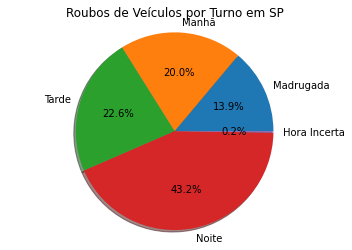

In [167]:
import matplotlib.pyplot as plt

contadormanha = 0 ; contadormadrugada = 0; contadortarde = 0; contadornoite = 0; horaincerta = 0

for key in df_roubo_veiculos.keys():
  for turno in df_roubo_veiculos[key]['PERIDOOCORRENCIA']:
    if 'manha' in turno:
      contadormanha = contadormanha+1
    elif 'madrugada' in turno:
      contadormadrugada = contadormadrugada+1
    elif 'tarde' in turno:
      contadortarde = contadortarde+1
    elif 'noite' in turno:
      contadornoite = contadornoite+1
    else:
      horaincerta = horaincerta + 1
  
roubos_por_turno = [contadormadrugada, contadormanha, contadortarde, contadornoite, horaincerta]
my_labels = 'Madrugada', 'Manhã', 'Tarde', 'Noite', 'Hora Incerta'
plt.pie(roubos_por_turno, labels=my_labels, autopct='%1.1f%%', shadow=True)
plt.title('Roubos de Veículos por Turno em SP')
plt.axis('equal')
plt.show()

Plotando um gráfico de barras que exibe a quantidade de BOs com autoria conhecida, desconhecida e ignorada entre os anos de 2021 e 2023 em São Paulo

<ipython-input-168-7d7ba45722fe>:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  autoria_bo = pd.Series()


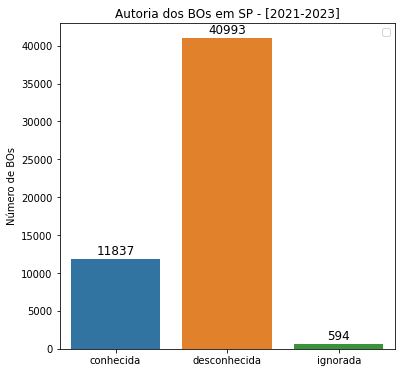

In [168]:
import seaborn as sns

autoria_bo = pd.Series()

for key in df_roubo_veiculos.keys():
  if autoria_bo.empty:
    autoria_bo = df_roubo_veiculos[key].pivot_table(columns=['BO_AUTORIA'], aggfunc='size')
  else:
    autoria_bo = autoria_bo + df_roubo_veiculos[key].pivot_table(columns=['BO_AUTORIA'], aggfunc='size')

data_bo = pd.DataFrame({'conhecida': autoria_bo['conhecida'], 'desconhecida':autoria_bo['desconhecida'], 'ignorada':autoria_bo['ignorado']}, index = [0,1,2])
plt.figure(figsize = (6,6))
plt.title('Autoria dos BOs em SP - [2021-2023]')
plots = sns.barplot(data = data_bo)
plt.ylabel('Número de BOs')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width() / 2, bar.get_height()), ha = 'center', va= 'center', size = 12, xytext=(0,8), textcoords = 'offset points')
plt.legend() 


Plotando um gráfico de barras que exibe a quantidade de BOs feitos em São Paulo por ano entre os anos de 2021 e 2023

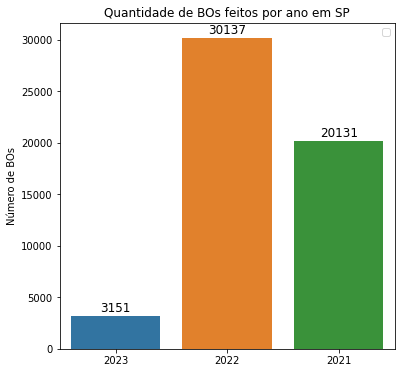

In [169]:
import seaborn as sns

qtd_bo = pd.Series([0,0,0], index=[2021,2022,2023])

for key in df_roubo_veiculos.keys():
    qtd_bo = qtd_bo.add(df_roubo_veiculos[key].pivot_table(columns=['ANO_BO'], aggfunc='size'), fill_value=0)

data_qtd_bo = pd.DataFrame({2023: qtd_bo[2023], 2022: qtd_bo[2022], 2021: qtd_bo[2021]}, index = [0,1,2])
plt.figure(figsize = (6,6))
plt.title('Quantidade de BOs feitos por ano em SP')
plots2 = sns.barplot(data = data_qtd_bo)
plt.ylabel('Número de BOs')
for bar in plots2.patches:
  plots2.annotate(format(bar.get_height(), '.0f'), (bar.get_x()+bar.get_width() / 2, bar.get_height()), ha = 'center', va= 'center', size = 12, xytext=(0,8), textcoords = 'offset points')
plt.legend() 
